In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import datasets
import pandas as pd

In [13]:
iris = pd.read_csv('/content/sample_data/iris.csv')
num_columns = houses.shape[1]
x = houses.drop(houses.iloc[:, 2:num_columns], axis=1).values
y = iris.target

AttributeError: ignored

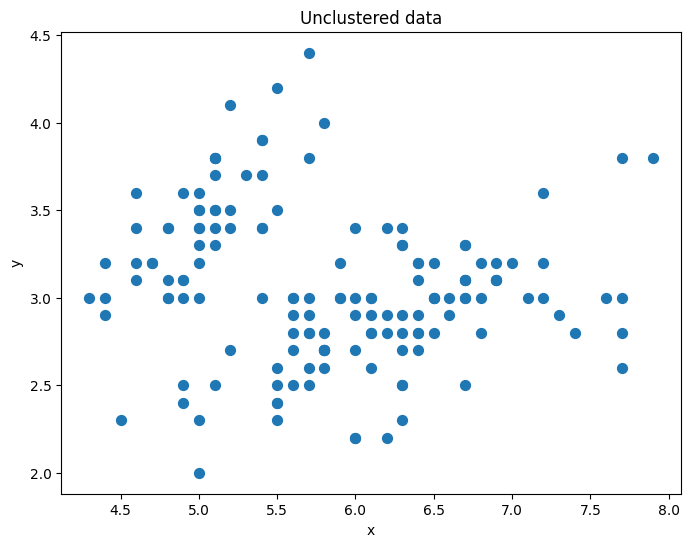

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Unclustered data')
plt.show()

In [4]:
class kMeans():
    def __init__(self, k=5, max_iter=100, tol=0.0001):
        self.k= k
        self.max_iter = max_iter
        self.tol = tol

    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))

    def fit(self, X_train):
        self.X_train = X_train

        idx = np.random.randint(len(X_train), size=self.k)
        self.centroids = X_train[idx,:]
        self.clusters = np.zeros(len(X_train))
        for i in range(self.max_iter):
            self.update_clusters()

            early_stop = self.update_centroids()

            if early_stop==True:
                print(f'Early stopping occured after {i} iterations')
                break

    def update_clusters(self):
        for row_idx, train_row in enumerate(self.X_train):
            dist = []
            for i in range(self.k):
                dist.append(self.euclidean(train_row, self.centroids[i]))
            self.clusters[row_idx] = np.argmin(np.array(dist))

    def update_centroids(self):
        new_centroids = np.copy(self.centroids)
        for i in range(self.k):
            new_centroids[i] = np.mean(self.X_train[self.clusters==i], axis=0)

        if np.linalg.norm(new_centroids-self.centroids)>self.tol:
            self.centroids = new_centroids
            return False
        else:
            self.centroids = new_centroids
            return True

    def predict(self, X_test):
        predictions = np.zeros(len(X_test))
        for row_idx, test_row in enumerate(X_test):
            dist = []
            for i in range(self.k):
                dist.append(self.euclidean(test_row, self.centroids[i]))
            predictions[row_idx] = np.argmin(np.array(dist))
        return predictions

In [6]:
model = kMeans(k=5, max_iter=30)
model.fit(X)
preds = model.predict(X)

Early stopping occured after 7 iterations


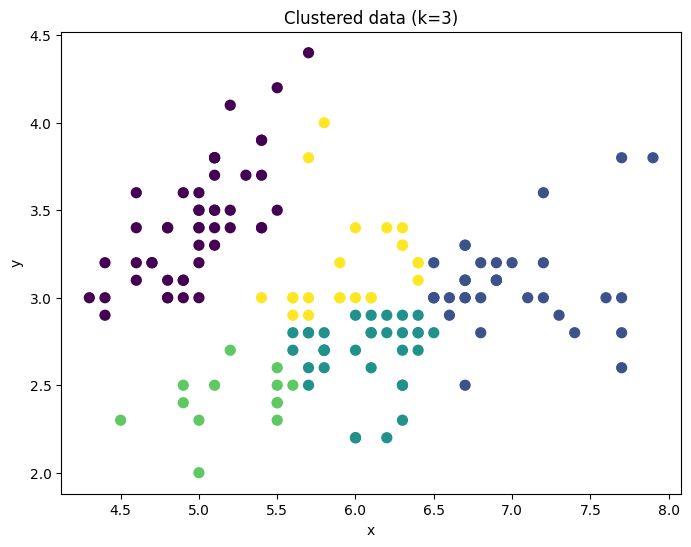

In [7]:
# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap='viridis', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustered data (k=3)')
plt.show()